In [75]:
import json
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from numpy import *
import math
import matplotlib.pyplot as plt
from ipywidgets import *
from IPython.display import display
plt.style.use('ggplot')
from pymongo import MongoClient

import pandas as pd
from pandas.io.json import json_normalize
import plotly.plotly as py
import plotly.graph_objs as go

from datetime import datetime
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge


In [76]:
from influxdb import DataFrameClient

In [77]:
client = DataFrameClient('34.217.33.66', 32589, 'root', 'root', 'k8s')
mongoclient = MongoClient('34.217.33.66', 27017, username="MongoServer3", password="cloud@SecureMongod75")


In [78]:
def getAllNodeNames():
    queryResult = client.query("SHOW TAG VALUES FROM uptime WITH KEY=nodename;")
    nodeNames_temp = list(queryResult.get_points())
    dfnodeNames = pd.DataFrame(nodeNames_temp)
    allNodeNames = dfnodeNames[:]["value"]
    return allNodeNames

In [79]:
def getNamespaceNames(node):
    nsQuery = client.query("SHOW TAG VALUES FROM uptime WITH KEY=namespace_name WHERE nodename = '"+node+"';")
    nsQuery_temp = list(nsQuery.get_points())
    dfnsNames = pd.DataFrame(nsQuery_temp)
    allnsNames = dfnsNames[:]["value"]
    return allnsNames

In [80]:
def getAllPodNames(node,ns_name):
    queryResult = client.query("SHOW TAG VALUES FROM uptime WITH KEY = pod_name WHERE namespace_name = '"+ns_name+"' AND nodename = '"+node+"';")
    podNames_temp = list(queryResult.get_points())
    dfpodNames = pd.DataFrame(podNames_temp)
    allpodNames = dfpodNames[:]["value"]
    return allpodNames

In [81]:
def getCPUUtilizationNode(node):
    queryResult = client.query('SELECT * FROM "cpu/node_utilization" where nodename = \''+node+'\' AND type=\'node\';')
    dfcpuUtilization = pd.DataFrame(queryResult['cpu/node_utilization'])
    return dfcpuUtilization

In [82]:
def getCPUUtilizationPod(node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "cpu/usage_rate" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\';')
    dfcpuUtilization = pd.DataFrame(queryResult['cpu/usage_rate'])
    return dfcpuUtilization

In [83]:
def getCPUUtilizationPodContainer(node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "cpu/usage_rate" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\' AND type=\'pod_container\';')
    dfcpuUtilization = pd.DataFrame(queryResult['cpu/usage_rate'])
    return dfcpuUtilization

In [84]:
def prepareCpuUtilization(node,ns_name, pod_name):
    cpuUtilization = getCPUUtilizationNode(node)
    podCpuUtilization = getCPUUtilizationPod(node,ns_name, pod_name)
    containercpuUtilization = getCPUUtilizationPodContainer(node,ns_name, pod_name)
    plt.plot(cpuUtilization.index, cpuUtilization['value'] *1000, 'r') # plotting t, a separately 
    plt.plot(podCpuUtilization.index, podCpuUtilization['value'], 'b') # plotting t, b separately 
    plt.plot(containercpuUtilization.index, containercpuUtilization['value'], 'g') # plotting t, c separately 
    plt.show()

In [85]:
def getMemoryUtilizationNode(node):
    queryResult = client.query('SELECT * FROM "memory/node_utilization" where nodename = \''+node+'\' AND type=\'node\';')
    dfmemUtilization = pd.DataFrame(queryResult['memory/node_utilization'])
    return dfmemUtilization

In [86]:
def getMemoryUtilizationPod(node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "memory/usage" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\';')
    dfmemUtilization = pd.DataFrame(queryResult['memory/usage'])
    return dfmemUtilization

In [87]:
def getMemoryUtilizationPodContainer(node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "memory/usage" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\' AND type=\'pod_container\';')
    dfmemUtilization = pd.DataFrame(queryResult['memory/usage'])
    return dfmemUtilization

In [88]:
def prepareMemoryUtilization(node,ns_name, pod_name):
    memoryUtilization = getMemoryUtilizationNode(node)
    podMemoryUtilization = getMemoryUtilizationPod(node,ns_name, pod_name)
    containerMemoryUtilization = getMemoryUtilizationPodContainer(node,ns_name, pod_name)
    plt.plot(memoryUtilization.index, memoryUtilization['value'] *1000000000, 'r') # plotting t, a separately 
    plt.plot(podMemoryUtilization.index, podMemoryUtilization['value'], 'b') # plotting t, b separately 
    plt.plot(containerMemoryUtilization.index, containerMemoryUtilization['value'], 'g') # plotting t, c separately 
    plt.show()

In [89]:
def getNetworkTxRatePod(node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "network/tx_rate" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\';')
    dfmemUtilization = pd.DataFrame(queryResult['network/tx_rate'])
    return dfmemUtilization

In [90]:
def getNetworkTxPod(node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "network/tx" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\';')
    dfmemUtilization = pd.DataFrame(queryResult['network/tx'])
    return dfmemUtilization

In [91]:
def getNetworkTxErrorsPod(node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "network/tx_errors" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\';')
    dfmemUtilization = pd.DataFrame(queryResult['network/tx_errors'])
    return dfmemUtilization

In [92]:
def getNetworkTxErrorsRatePod(node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "network/tx_errors_rate" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\';')
    dfmemUtilization = pd.DataFrame(queryResult['network/tx_errors_rate'])
    return dfmemUtilization

In [93]:
def prepareNetworkTxRateUtilization(node,ns_name, pod_name):
    podNetworTxRate = getNetworkTxRatePod(node,ns_name, pod_name)
    podNetworTx = getNetworkTxPod(node,ns_name, pod_name)
    podNetworkError = getNetworkTxErrorsPod(node,ns_name, pod_name)
    podNetworkErrorRate = getNetworkTxErrorsRatePod(node,ns_name, pod_name)
    plt.plot(podNetworTxRate.index, podNetworTxRate['value'], 'b') # plotting t, b separately 
    #plt.plot(podNetworTx.index, podNetworTx['value'], 'g') # plotting t, b separately 
    #plt.plot(podNetworkError.index, podNetworkError['value'], 'y') # plotting t, b separately 
    plt.plot(podNetworkErrorRate.index, podNetworkErrorRate['value'], 'r') # plotting t, b separately 
    plt.show()

In [94]:
def getNetworkRxRatePod(node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "network/rx_rate" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\';')
    dfmemUtilization = pd.DataFrame(queryResult['network/rx_rate'])
    return dfmemUtilization
def getNetworkRxPod(node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "network/rx" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\';')
    dfmemUtilization = pd.DataFrame(queryResult['network/rx'])
    return dfmemUtilization

def getNetworkRxErrorsPod(node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "network/rx_errors" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\';')
    dfmemUtilization = pd.DataFrame(queryResult['network/rx_errors'])
    return dfmemUtilization
def getNetworkRxErrorsRatePod(node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "network/rx_errors_rate" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\';')
    dfmemUtilization = pd.DataFrame(queryResult['network/rx_errors_rate'])
    return dfmemUtilization

In [95]:
def prepareNetworkRxRateUtilization(node,ns_name, pod_name):
    podNetworRxRate = getNetworkRxRatePod(node,ns_name, pod_name)
    podNetworRx = getNetworkRxPod(node,ns_name, pod_name)
    podNetworkError = getNetworkRxErrorsPod(node,ns_name, pod_name)
    podNetworkErrorRate = getNetworkRxErrorsRatePod(node,ns_name, pod_name)
    plt.plot(podNetworRxRate.index, podNetworRxRate['value'], 'b') # plotting t, b separately 
    #plt.plot(podNetworRx.index, podNetworRx['value'], 'g') # plotting t, b separately 
    #plt.plot(podNetworkError.index, podNetworkError['value'], 'y') # plotting t, b separately 
    plt.plot(podNetworkErrorRate.index, podNetworkErrorRate['value'], 'r') # plotting t, b separately 
    plt.show()

In [96]:
allNodeNames  = getAllNodeNames()
allNodeNames

0    ip-172-31-32-173
1     ip-172-31-34-70
2     ip-172-31-41-54
3    ip-172-31-44-145
4     ip-172-31-47-11
Name: value, dtype: object

In [97]:
nsNames = getNamespaceNames(allNodeNames[3])
allPodNamesLarge = getAllPodNames (allNodeNames[3], nsNames[0])
allPodNamesSmall = getAllPodNames (allNodeNames[2], nsNames[0])
allPodNames2xLarge = getAllPodNames (allNodeNames[1], nsNames[0])
allPodNamesMedium = getAllPodNames (allNodeNames[4], nsNames[0])


In [98]:
#prepareMemoryUtilization(allNodeNames[3],nsNames[0], allPodNamesLarge[3])
#prepareCpuUtilization(allNodeNames[3],nsNames[0], allPodNamesLarge[3])
#prepareNetworkTxRateUtilization(allNodeNames[3],nsNames[0], allPodNamesLarge[3])
#prepareNetworkRxRateUtilization(allNodeNames[3],nsNames[0], allPodNamesLarge[3])

In [99]:
def getMongoDf(dbName, collectionName):
    db = mongoclient[dbName]
    collection_name = collectionName
    datapoints = list(db.kubeserver.find({}))
    dfMongo = json_normalize(datapoints)
    dfMongo = dfMongo.drop(['intermediate'], axis=1)
    dfMongo = dfMongo.drop(['aggregate.codes.200'], axis=1)
    dfMongo = dfMongo.drop(['_id'], axis=1)
    if('aggregate.errors.ECONNRESET' in dfMongo.columns):
        dfMongo = dfMongo.drop(['aggregate.errors.ECONNRESET'], axis=1)
    if('aggregate.errors.ECONNREFUSED' in dfMongo.columns):
        dfMongo = dfMongo.drop(['aggregate.errors.ECONNREFUSED'], axis=1)
    if('aggregate.errors.ESOCKETTIMEDOUT' in dfMongo.columns):
        dfMongo = dfMongo.drop(['aggregate.errors.ETIMEDOUT'], axis=1)
    dfMongo = dfMongo.drop(['aggregate.latency.p95'], axis=1)
    dfMongo = dfMongo.drop(['aggregate.latency.p99'], axis=1)
    dfMongo = dfMongo.drop(['aggregate.rps.count'], axis=1)
    #dfMongo = dfMongo.drop(['aggregate.rps.mean'], axis=1)
    dfMongo = dfMongo.drop(['aggregate.scenarioDuration.max'], axis=1)
    dfMongo = dfMongo.drop(['aggregate.scenarioDuration.min'], axis=1)
    dfMongo = dfMongo.drop(['aggregate.scenarioDuration.p95'], axis=1)
    dfMongo = dfMongo.drop(['aggregate.scenarioDuration.p99'], axis=1)
    dfMongo = dfMongo.drop(['aggregate.latency.max'], axis=1)
    dfMongo = dfMongo.drop(['aggregate.latency.min'], axis=1)
    dfMongo = dfMongo.drop(['aggregate.matches'], axis=1)
    dfMongo = dfMongo.drop(['aggregate.requestsCompleted'], axis=1)
    return dfMongo

In [165]:
def assignValues(node,ns_name, pod_name,dbName,collectionName):
    cpuUtilization = getCPUUtilizationNode(node)
    podCpuUtilization = getCPUUtilizationPod(node,ns_name, pod_name)
    containercpuUtilization = getCPUUtilizationPodContainer(node,ns_name, pod_name)
    memoryUtilization = getMemoryUtilizationNode(node)
    podMemoryUtilization = getMemoryUtilizationPod(node,ns_name, pod_name)
    containerMemoryUtilization = getMemoryUtilizationPodContainer(node,ns_name, pod_name)
    podNetworTxRate = getNetworkTxRatePod(node,ns_name, pod_name)
    podNetworTx = getNetworkTxPod(node,ns_name, pod_name)
    podNetworkError = getNetworkTxErrorsPod(node,ns_name, pod_name)
    podNetworkErrorRate = getNetworkTxErrorsRatePod(node,ns_name, pod_name)
    df = getMongoDf(dbName,collectionName)
    df2 = pd.DataFrame()
    df = df.reset_index(drop=True)
    df2 = df2.reset_index(drop=True)
    df['cpuNode'] = pd.Series(cpuUtilization['value'].values)
    df['cpuPod'] = pd.Series(podCpuUtilization['value'].values / 1000)
    df['cpuContainer'] = pd.Series(containercpuUtilization['value'].values / 1000)
    df['memNode'] = pd.Series(memoryUtilization['value'].values)
    df['memPod'] = pd.Series(podMemoryUtilization['value'].values / 1000000000)
    df['memContainer'] = pd.Series(containerMemoryUtilization['value'].values / 1000000000)
    df['networkTx'] = pd.Series(podNetworTxRate['value'].values)
    df['networkTxError'] = pd.Series(podNetworkErrorRate['value'].values)
    df['networkTx'] = df['networkTx'].values /df['networkTx'].max()
    df['aggregate.scenariosCreated'] = df['aggregate.scenariosCreated'].values / df['aggregate.scenariosCreated'].max()
    df['aggregate.scenariosCompleted'] = df['aggregate.scenariosCompleted'].values /df['aggregate.scenariosCompleted'].max()
    df['aggregate.latency.median'] = df['aggregate.latency.median'].values /df['aggregate.latency.median'].max()
    #df2['latencyMedian'] = pd.Series(df['aggregate.latency.median'].values)
    df['aggregate.scenarioDuration.median'] = df['aggregate.scenarioDuration.median'].values / df['aggregate.scenarioDuration.median'].max()
    df['aggregate.rps.mean'] = df['aggregate.rps.mean'].values / df['aggregate.rps.mean'].max()
    #df3 = pd.concat([df2, df[['aggregate.latency.median', 'aggregate.scenarioDuration.median']]], axis=1)
    return df
    
    

In [166]:
newdf = assignValues(allNodeNames[3],nsNames[0], allPodNamesLarge[3],'t2large', 'kubeserver')
newdf = newdf.fillna(0)
newdf['core'] = 2
newdf['mem'] = 8

newdfSmall = assignValues(allNodeNames[2],nsNames[0], allPodNamesSmall[3],'t2small', 'kubeserver')
newdfSmall = newdfSmall.fillna(0)
newdfSmall['core'] = 1
newdfSmall['mem'] = 2

newdfMedium = assignValues(allNodeNames[4],nsNames[0], allPodNamesMedium[3],'t2medium', 'kubeserver')
newdfMedium = newdfMedium.fillna(0)
newdfMedium['core'] = 2
newdfMedium['mem'] = 4

newdf2xLarge = assignValues(allNodeNames[1],nsNames[0], allPodNames2xLarge[3],'t22xlarge', 'kubeserver')
newdf2xLarge = newdf2xLarge.fillna(0)
newdf2xLarge['core'] = 8
newdf2xLarge['mem'] = 16


In [167]:
newdf.head()

,aggregate.errors.ESOCKETTIMEDOUT,aggregate.latency.median,aggregate.rps.mean,aggregate.scenarioDuration.median,aggregate.scenariosCompleted,aggregate.scenariosCreated,aggregate.timestamp,cpuNode,cpuPod,cpuContainer,memNode,memPod,memContainer,networkTx,networkTxError,core,mem
0,2.0,0.001396,0.005428,0.001524,0.004167,0.004694,2018-01-29T11:58:59.351Z,0.0000,0.019,0.019,0.424041,0.051446,0.050885,0.027268,0,2,8
1,0.0,0.001128,0.010856,0.001260,0.029412,0.009388,2018-01-29T12:00:01.493Z,0.1135,0.024,0.024,0.423692,0.057246,0.056685,0.040728,0,2,8
2,0.0,0.000983,0.016284,0.001126,0.044118,0.014082,2018-01-29T12:01:03.604Z,0.1240,0.032,0.032,0.429363,0.074805,0.074244,0.056665,0,2,8
3,0.0,0.000985,0.021767,0.001121,0.058824,0.018776,2018-01-29T12:02:05.902Z,0.1680,0.039,0.039,0.434854,0.054649,0.054088,0.070847,0,2,8
4,0.0,0.000934,0.027194,0.001074,0.073529,0.023471,2018-01-29T12:03:07.890Z,0.1715,0.051,0.051,0.438349,0.096104,0.095543,0.082775,0,2,8


In [168]:
#plt.plot(newdf['aggregate.timestamp'], newdf['memNode']*1000, 'b') # plotting t, b separately 
#plt.plot(newdf['aggregate.timestamp'], newdf['aggregate.scenariosCompleted'], 'g') # plotting t, b separately 
#plt.plot(newdf['aggregate.timestamp'], newdf['cpuNode']*1000, 'r') # plotting t, b separately 
#plt.plot(podNetworkError.index, podNetworkError['value'], 'y') # plotting t, b separately 
#plt.plot(podNetworkErrorRate.index, podNetworkErrorRate['value'], 'r') # plotting t, b separately 
#plt.show()

In [288]:
from pandas import read_csv
newdf.to_csv('LRdatalarge1.csv')
newdfSmall.to_csv('LRdatasmall1.csv')
newdfMedium.to_csv('LRdatamedium1.csv')
newdf2xLarge.to_csv('LRdata2xlarge1.csv')

datasetLarge = read_csv('LRdatalarge1.csv', header=0, index_col=0)
datasetSmall = read_csv('LRdatasmall1.csv', header=0, index_col=0)
datasetMedium = read_csv('LRdatamedium1.csv', header=0, index_col=0)
dataset2xLarge = read_csv('LRdata2xlarge1.csv', header=0, index_col=0)


dfLarge = pd.DataFrame(datasetLarge)
dfSmall = pd.DataFrame(datasetSmall)
dfMedium = pd.DataFrame(datasetMedium)
df2xLarge = pd.DataFrame(dataset2xLarge)


In [297]:
d2dfsmall = dfSmall.drop(['aggregate.timestamp','mem','core','aggregate.errors.ESOCKETTIMEDOUT','aggregate.scenariosCompleted', 'memPod', 'memContainer','networkTx',   'networkTxError', 'aggregate.latency.median', 'aggregate.scenarioDuration.median', 'memNode', 'aggregate.rps.mean', 'cpuPod', 'cpuContainer'], axis=1)
d3dfsmall = dfSmall.drop(['aggregate.timestamp','mem','aggregate.errors.ESOCKETTIMEDOUT','aggregate.scenariosCompleted', 'memPod', 'memContainer','networkTx',   'networkTxError', 'aggregate.latency.median', 'aggregate.scenarioDuration.median', 'memNode', 'aggregate.rps.mean', 'cpuPod', 'cpuContainer'], axis=1)
d4dfsmall = dfSmall.drop(['aggregate.timestamp','aggregate.errors.ESOCKETTIMEDOUT','aggregate.scenariosCompleted', 'memPod', 'memContainer','networkTx',   'networkTxError', 'aggregate.latency.median', 'aggregate.scenarioDuration.median', 'memNode', 'aggregate.rps.mean', 'cpuPod', 'cpuContainer'], axis=1)


d2dflarge = dfLarge.drop(['aggregate.timestamp','mem','core','aggregate.errors.ESOCKETTIMEDOUT','aggregate.scenariosCompleted', 'memPod', 'memContainer','networkTx',   'networkTxError', 'aggregate.latency.median', 'aggregate.scenarioDuration.median', 'memNode', 'aggregate.rps.mean', 'cpuPod', 'cpuContainer'], axis=1)
d3dflarge = dfLarge.drop(['aggregate.timestamp','mem','aggregate.errors.ESOCKETTIMEDOUT','aggregate.scenariosCompleted', 'memPod', 'memContainer','networkTx',   'networkTxError', 'aggregate.latency.median', 'aggregate.scenarioDuration.median', 'memNode', 'aggregate.rps.mean', 'cpuPod', 'cpuContainer'], axis=1)
d4dflarge = dfLarge.drop(['aggregate.timestamp','aggregate.errors.ESOCKETTIMEDOUT','aggregate.scenariosCompleted', 'memPod', 'memContainer','networkTx',   'networkTxError', 'aggregate.latency.median', 'aggregate.scenarioDuration.median', 'memNode', 'aggregate.rps.mean', 'cpuPod', 'cpuContainer'], axis=1)


d2dfmedium = dfMedium.drop(['aggregate.timestamp','mem','core','aggregate.errors.ESOCKETTIMEDOUT','aggregate.scenariosCompleted', 'memPod', 'memContainer','networkTx',   'networkTxError', 'aggregate.latency.median', 'aggregate.scenarioDuration.median', 'memNode', 'aggregate.rps.mean', 'cpuPod', 'cpuContainer'], axis=1)
d3dfmedium = dfMedium.drop(['aggregate.timestamp','mem','aggregate.errors.ESOCKETTIMEDOUT','aggregate.scenariosCompleted', 'memPod', 'memContainer','networkTx',   'networkTxError', 'aggregate.latency.median', 'aggregate.scenarioDuration.median', 'memNode', 'aggregate.rps.mean', 'cpuPod', 'cpuContainer'], axis=1)
d4dfmedium = dfMedium.drop(['aggregate.timestamp','aggregate.errors.ESOCKETTIMEDOUT','aggregate.scenariosCompleted', 'memPod', 'memContainer','networkTx',   'networkTxError', 'aggregate.latency.median', 'aggregate.scenarioDuration.median', 'memNode', 'aggregate.rps.mean', 'cpuPod', 'cpuContainer'], axis=1)


d2df2xlarge = df2xLarge.drop(['aggregate.timestamp','mem','core','aggregate.errors.ETIMEDOUT','aggregate.scenariosCompleted', 'memPod', 'memContainer','networkTx',   'networkTxError', 'aggregate.latency.median', 'aggregate.scenarioDuration.median', 'memNode', 'aggregate.rps.mean', 'cpuPod', 'cpuContainer'], axis=1)
d3df2xlarge = df2xLarge.drop(['aggregate.timestamp','mem','aggregate.errors.ETIMEDOUT','aggregate.scenariosCompleted', 'memPod', 'memContainer','networkTx',   'networkTxError', 'aggregate.latency.median', 'aggregate.scenarioDuration.median', 'memNode', 'aggregate.rps.mean', 'cpuPod', 'cpuContainer'], axis=1)
d4df2xlarge = df2xLarge.drop(['aggregate.timestamp','aggregate.errors.ETIMEDOUT','aggregate.scenariosCompleted', 'memPod', 'memContainer','networkTx',   'networkTxError', 'aggregate.latency.median', 'aggregate.scenarioDuration.median', 'memNode', 'aggregate.rps.mean', 'cpuPod', 'cpuContainer'], axis=1)



# 2d Linear Regression

In [314]:
#X = testdf.drop(['cpuNode','aggregate.timestamp', 'cpuPod', 'cpuContainer', 'memPod', 'memContainer','networkTx',   'networkTxError'], axis=1)
#X = testdf.drop(['cpuNode','aggregate.timestamp', 'memPod', 'memContainer','networkTx',   'networkTxError', 'aggregate.latency.median', 'aggregate.scenarioDuration.median', 'memNode', 'aggregate.rps.mean', 'cpuPod', 'cpuContainer'], axis=1)
toDropX = ['cpuNode']
d3df = d3dfsmall[:50]

X = d3df.drop(toDropX, axis=1)
y = d3df['cpuNode']

Xlarge = d3dflarge.drop(toDropX, axis=1)
ylarge = d3dflarge['cpuNode']

Xmedium = d3dfmedium.drop(toDropX, axis=1)
ymedium = d3dfmedium['cpuNode']

X2xlarge = d3df2xlarge.drop(toDropX, axis=1)
y2xlarge = d3df2xlarge['cpuNode']


#X_train =X[:20]
#X_test =X.tail(10)
#y_train =y[:20]
#y_test =y.tail(10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [315]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
a = 0.3
for name,met in [
        ('linear regression', LinearRegression()),
        #('lasso', Lasso(fit_intercept=True, alpha=a)),
        #('ridge', Ridge(fit_intercept=True, alpha=a)),
        #('elastic-net', ElasticNet(fit_intercept=True, alpha=a))
        ]:
    met.fit(X_train,y_train)
    y_predictsmall = met.predict(X_test)
    
    
    y_predictlarge = met.predict(Xlarge)
    
    
    y_predictmedium = met.predict(Xmedium)
    
    
    y_predict2xlarge = met.predict(X2xlarge)
    
    # The mean squared error
    print ("a= ", a)
    print("Mean squared error small: %.2f"
          % mean_squared_error(y_test, y_predictsmall))
    print("Mean squared error large: %.2f"
          % mean_squared_error(ylarge, y_predictlarge))
    print("Mean squared error medium: %.2f"
      % mean_squared_error(ymedium, y_predictmedium))
    print("Mean squared error 2xlarge: %.2f"
          % mean_squared_error(y2xlarge, y_predict2xlarge))
    
    # Explained variance score: 1 is perfect prediction
    print('Variance score small: %.2f' % r2_score(y_test, y_predictsmall))
        # Explained variance score: 1 is perfect prediction
    print('Variance score large: %.2f' % r2_score(ylarge, y_predictlarge))
        # Explained variance score: 1 is perfect prediction
    print('Variance score medium: %.2f' % r2_score(ymedium, y_predictmedium))
        # Explained variance score: 1 is perfect prediction
    print('Variance score 2xlarge: %.2f' % r2_score(y2xlarge, y_predict2xlarge))
    print('met',met)


a=  0.3
Mean squared error small: 0.02
Mean squared error large: 0.30
Mean squared error medium: 0.31
Mean squared error 2xlarge: 1.19
Variance score small: 0.70
Variance score large: -5.05
Variance score medium: -3.92
Variance score 2xlarge: -171.54
met LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [316]:

#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#scaler.fit(X_train)
#x_s = scaler.transform(X_train)

#sgdreg = SGDRegressor(penalty='l2', alpha=0.15, max_iter=200)

# Compute RMSE on training data
#sgdreg.fit(x_s,y_train)
#y_predict = sgdreg.predict(X_test)
#X_predict = sgdreg.predict(X_train)

#print("Mean squared error test: %.2f"
#      % mean_squared_error(y_test, y_predict))
#print("Mean squared error train: %.2f"
#      % mean_squared_error(y_train, X_predict))
# Explained variance score: 1 is perfect prediction
#print('Variance score: %.2f' % r2_score(y_test, y_predict))


In [317]:
pd.DataFrame(list(zip(X,y)), columns = ['predict', 'test']).head()

,predict,test
0,aggregate.scenariosCreated,0.000
1,core,0.234


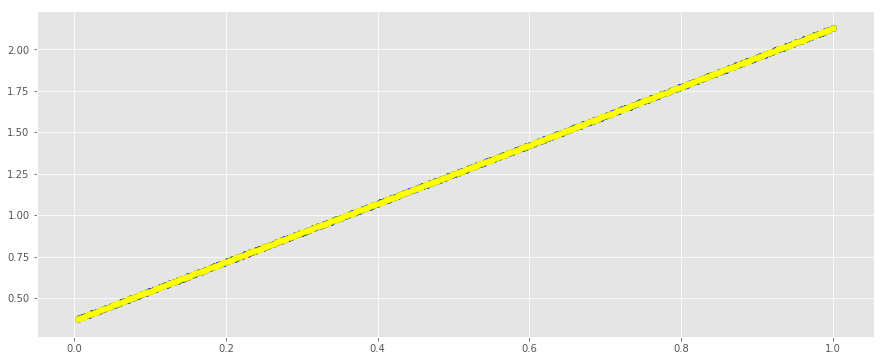

In [332]:
# Plot outputs
#plt.scatter(X_predict, y_train,  color='pink')
#plt.scatter(X_train['aggregate.scenariosCompleted'], y_train,  color='blue')
#plt.scatter(X_train['memNode'], y_train,  color='red')
#plt.scatter(X_train['aggregate.latency.median'], y_train,  color='green')
plt.scatter(X_test['aggregate.scenariosCreated'], y_predictsmall,  color='red')

plt.scatter(Xlarge['aggregate.scenariosCreated'], y_predictlarge,  color='blue')

plt.scatter(Xmedium['aggregate.scenariosCreated'], y_predictmedium,  color='green')

plt.scatter(X2xlarge['aggregate.scenariosCreated'], y_predict2xlarge,  color='yellow')

#plt.plot(X_test, y_predict, color='blue')


plt.show()

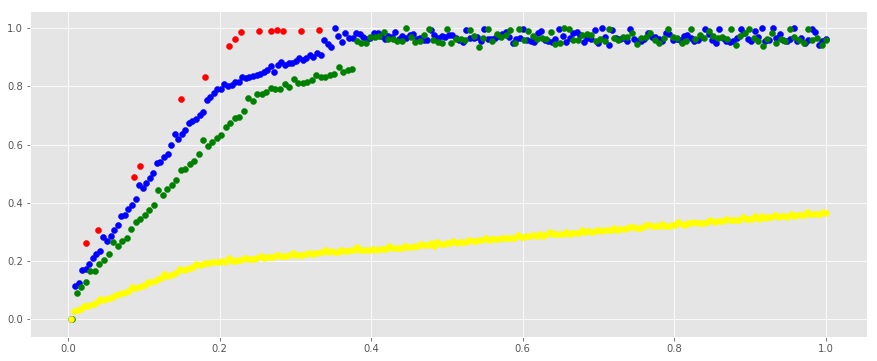

In [333]:
plt.scatter(X_test['aggregate.scenariosCreated'], y_test,  color='red')

plt.scatter(Xlarge['aggregate.scenariosCreated'], ylarge,  color='blue')

plt.scatter(Xmedium['aggregate.scenariosCreated'], ymedium,  color='green')

plt.scatter(X2xlarge['aggregate.scenariosCreated'], y2xlarge,  color='yellow')

#plt.plot(X_test, y_predict, color='blue')


plt.show()

In [795]:
dfMy = testdf.set_index(pd.DatetimeIndex(testdf['aggregate.timestamp']))
dfMy = dfMy.drop(['aggregate.timestamp'], axis=1)

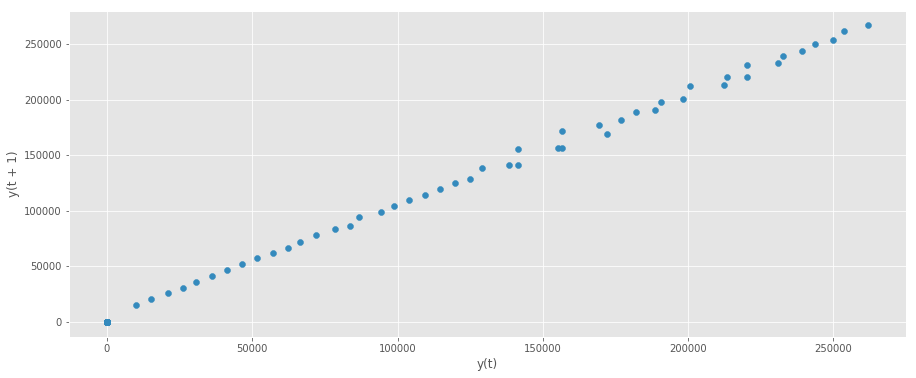

In [796]:
from pandas.plotting import lag_plot
lag_plot(dfMy)

In [797]:
onlyCPU = dfMy['cpuNode']

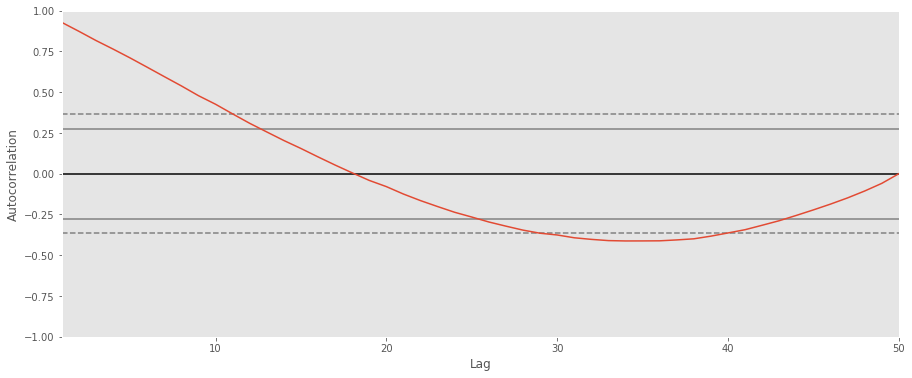

In [798]:
values = pd.DataFrame(onlyCPU.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
result = dataframe.corr()
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
autocorrelation_plot(onlyCPU)
pyplot.show()

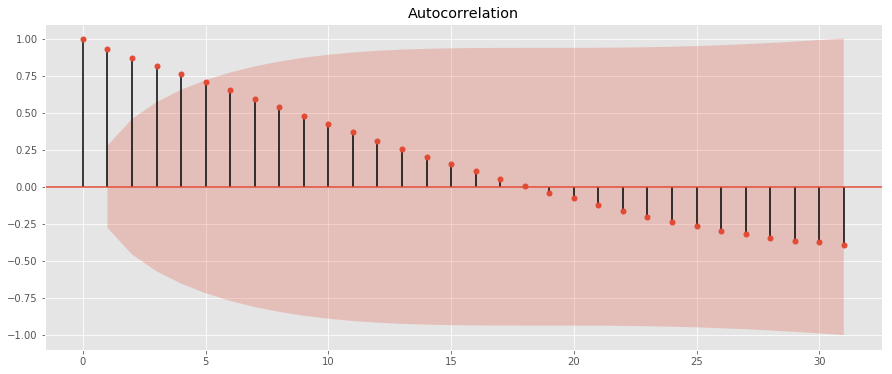

In [799]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(onlyCPU, lags=31)
pyplot.show()

In [800]:
from statsmodels.tsa.ar_model import AR
# train autoregression
testingData = onlyCPU.values
train, test = testingData[1:len(onlyCPU)-20], testingData[len(onlyCPU)-20:]
modelAR = AR(train)

Lag: 9
Coefficients: [ 0.06769004  0.04266457 -0.01191643  0.08087569  0.0807939   0.82013337
  0.0877122   0.03858176 -0.15564539  0.05047984]
predicted=0.635441, expected=0.619000
predicted=0.651814, expected=0.637500
predicted=0.663707, expected=0.649000
predicted=0.694943, expected=0.673500
predicted=0.730827, expected=0.680500
predicted=0.736875, expected=0.689000
predicted=0.750811, expected=0.702500
predicted=0.763202, expected=0.711500
predicted=0.796508, expected=0.753000
predicted=0.829398, expected=0.764500
predicted=0.840821, expected=0.779000
predicted=0.853694, expected=0.790000
predicted=0.867068, expected=0.791500
predicted=0.900876, expected=0.807500
predicted=0.932633, expected=0.802500
predicted=0.948019, expected=0.804500
predicted=0.960382, expected=0.816000
predicted=0.975126, expected=0.814500
predicted=1.008698, expected=0.831500
predicted=1.040296, expected=0.828000
Test MSE: 0.010


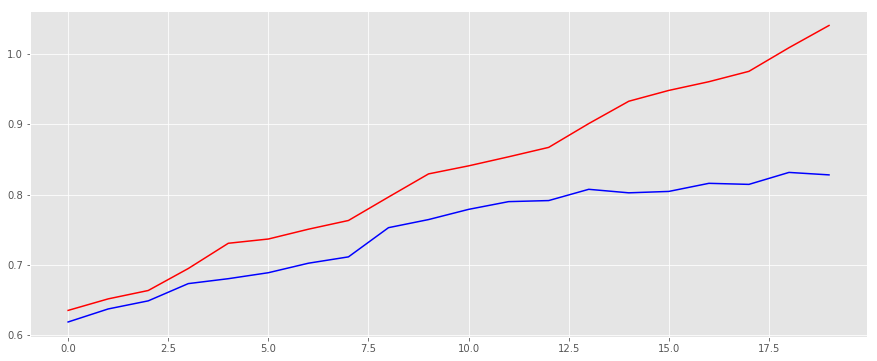

In [801]:
model_fit = modelAR.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
pyplot.plot(test, color='blue')
pyplot.plot(predictions, color='red')
pyplot.show()

predicted=0.635441, expected=0.619000
predicted=0.651113, expected=0.637500
predicted=0.663292, expected=0.649000
predicted=0.693157, expected=0.673500
predicted=0.727601, expected=0.680500
predicted=0.719154, expected=0.689000
predicted=0.733264, expected=0.702500
predicted=0.741958, expected=0.711500
predicted=0.770070, expected=0.753000
predicted=0.778058, expected=0.764500
predicted=0.787547, expected=0.779000
predicted=0.800966, expected=0.790000
predicted=0.814586, expected=0.791500
predicted=0.850997, expected=0.807500
predicted=0.865470, expected=0.802500
predicted=0.879858, expected=0.804500
predicted=0.886151, expected=0.816000
predicted=0.890565, expected=0.814500
predicted=0.902124, expected=0.831500
predicted=0.900339, expected=0.828000
Test MSE: 0.002


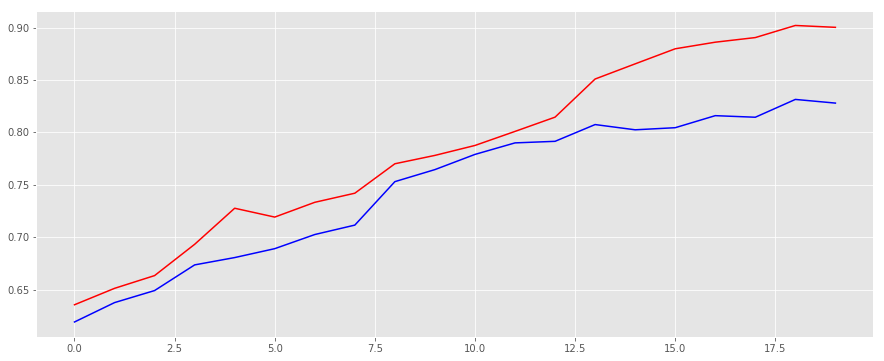

In [802]:
modelAR = AR(train)
model_fit = modelAR.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test, color='blue')
pyplot.plot(predictions, color='red')
pyplot.show()

In [1325]:
dfKeras = newdf.set_index(pd.DatetimeIndex(newdf['aggregate.timestamp']))
dfKeras = dfKeras.drop(['aggregate.timestamp'], axis=1)
dfKeras['core'] = 2
dfKeras['mem'] = 8

dfKerasSmall = newdfSmall.set_index(pd.DatetimeIndex(newdfSmall['aggregate.timestamp']))
dfKerasSmall = dfKerasSmall.drop(['aggregate.timestamp'], axis=1)
dfKerasSmall['core'] = 1
dfKerasSmall['mem'] = 2

dfKeras2xLarge = newdf2xLarge.set_index(pd.DatetimeIndex(newdf2xLarge['aggregate.timestamp']))
dfKeras2xLarge = dfKeras2xLarge.drop(['aggregate.timestamp'], axis=1)

dfKeras2xLarge['core'] = 8
dfKeras2xLarge['mem'] = 16

dfKerasMedium = newdfMedium.set_index(pd.DatetimeIndex(newdfMedium['aggregate.timestamp']))
dfKerasMedium = dfKerasMedium.drop(['aggregate.timestamp'], axis=1)

dfKerasMedium['core'] = 2
dfKerasMedium['mem'] = 4


In [1326]:
# mark all NA values with 0
dfKeras.fillna(0, inplace=True)
#dfKeras = dfKeras[['cpuNode', 'core','aggregate.scenariosCreated', 'mem']]
dfKeras = dfKeras[['cpuNode', 'core','mem','aggregate.scenariosCreated']]

dfKerasSmall.fillna(0, inplace=True)
#dfKerasSmall = dfKerasSmall[['cpuNode', 'core','aggregate.scenariosCreated', 'mem']]
dfKerasSmall = dfKerasSmall[['cpuNode', 'core','mem','aggregate.scenariosCreated']]



dfKeras2xLarge.fillna(0, inplace=True)
#dfKeras2xLarge = dfKeras2xLarge[['cpuNode', 'core','aggregate.scenariosCreated', 'mem']]
dfKeras2xLarge = dfKeras2xLarge[['cpuNode', 'core', 'mem','aggregate.scenariosCreated']]

dfKerasMedium.fillna(0, inplace=True)
#dfKerasMedium = dfKerasMedium[['cpuNode', 'core','aggregate.scenariosCreated', 'mem']]
dfKerasMedium = dfKerasMedium[['cpuNode', 'core','mem','aggregate.scenariosCreated']]

#dfKeras= dfKeras.append(dfKerasMedium)
#dfKeras= dfKeras.append(dfKeras2xLarge)
#dfKeras= dfKeras.append(dfKerasSmall)

dfKeras.head()

,cpuNode,core,mem,aggregate.scenariosCreated
aggregate.timestamp,,,,
2018-01-29 11:58:59.351,0.0000,2,8,0.004694
2018-01-29 12:00:01.493,0.1135,2,8,0.009388
2018-01-29 12:01:03.604,0.1240,2,8,0.014082
2018-01-29 12:02:05.902,0.1680,2,8,0.018776
2018-01-29 12:03:07.890,0.1715,2,8,0.023471


In [1327]:
dfKeras.to_csv('datalarge1.csv')
dfKerasSmall.to_csv('datasmall1.csv')
dfKeras2xLarge.to_csv('data2xlarge1.csv')
dfKerasMedium.to_csv('dataMedium1.csv')

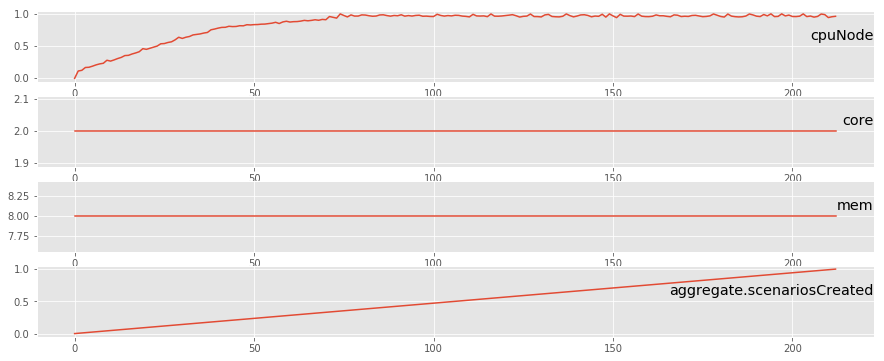

In [1328]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = read_csv('datalarge1.csv', header=0, index_col=0)
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [1329]:
from sklearn import preprocessing
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = read_csv('datalarge1.csv', header=0, index_col=0)
values = dataset.values
# integer encode direction
encoder = preprocessing.LabelEncoder()
values[:,3] = encoder.fit_transform(values[:,3])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
reframed.drop(reframed.columns[[ 5,6,7]], axis=1, inplace=True)
print(reframed.head())


# load dataset
datasetSmall = read_csv('dataSmall1.csv', header=0, index_col=0)
valuesSmall = datasetSmall.values
# integer encode direction
encoderSmall = preprocessing.LabelEncoder()
valuesSmall[:,3] = encoderSmall.fit_transform(valuesSmall[:,3])
# ensure all data is float
valuesSmall = valuesSmall.astype('float32')
# normalize features
scalerSmall = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaledSmall = scalerSmall.fit_transform(valuesSmall)
# frame as supervised learning
reframedSmall = series_to_supervised(scaledSmall, 1, 1)
reframedSmall.drop(reframedSmall.columns[[5,6,7]], axis=1, inplace=True)
print(reframedSmall.head())


# load dataset
dataset2xLarge = read_csv('data2xlarge1.csv', header=0, index_col=0)
values2xLarge = dataset2xLarge.values
# integer encode direction
encoder2xLarge = preprocessing.LabelEncoder()
values2xLarge[:,3] = encoder2xLarge.fit_transform(values2xLarge[:,3])
# ensure all data is float
values2xLarge = values2xLarge.astype('float32')
# normalize features
scaler2xLarge = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaled2xLarge = scaler2xLarge.fit_transform(values2xLarge)
# frame as supervised learning
reframed2xLarge = series_to_supervised(scaled2xLarge, 1, 1)
reframed2xLarge.drop(reframed2xLarge.columns[[ 5,6,7]], axis=1, inplace=True)
print(reframed2xLarge.head())


# load dataset
datasetmedium = read_csv('datamedium1.csv', header=0, index_col=0)
valuesmedium = datasetmedium.values
# integer encode direction
encodermedium = preprocessing.LabelEncoder()
valuesmedium[:,3] = encodermedium.fit_transform(valuesmedium[:,3])
# ensure all data is float
valuesmedium = valuesmedium.astype('float32')
# normalize features
scalermedium = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaledmedium = scalermedium.fit_transform(valuesmedium)
# frame as supervised learning
reframedmedium = series_to_supervised(scaledmedium, 1, 1)
reframedmedium.drop(reframedmedium.columns[[5,6,7]], axis=1, inplace=True)
print(reframedmedium.head())


   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var1(t)
1     0.0000        0.0        0.0   0.000000   0.1135
2     0.1135        0.0        0.0   0.004717   0.1240
3     0.1240        0.0        0.0   0.009434   0.1680
4     0.1680        0.0        0.0   0.014151   0.1715
5     0.1715        0.0        0.0   0.018868   0.1890
   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var1(t)
1      0.000        0.0        0.0   0.000000    0.234
2      0.234        0.0        0.0   0.007937    0.262
3      0.262        0.0        0.0   0.015873    0.280
4      0.280        0.0        0.0   0.023810    0.305
5      0.305        0.0        0.0   0.031746    0.341
   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)   var1(t)
1   0.000000        0.0        0.0   0.000000  0.076609
2   0.076609        0.0        0.0   0.004255  0.082057
3   0.082057        0.0        0.0   0.008511  0.093973
4   0.093973        0.0        0.0   0.012766  0.118829
5   0.118829        0.0        0.0   0.017021  0.117467
   v

In [1333]:
valuesLarge = reframed.values
valuesSmall = reframedSmall.values
valuesmedium = reframedmedium.values

n_train_samp = 50
train = valuesLarge#[:n_train_samp, :]
test = valuesLarge#[n_train_samp:, :]
num_features=6
dim = num_features - 1

In [1334]:
test.shape

(212, 5)

In [1335]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]


In [1336]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(212, 1, 4) (212,) (212, 1, 4) (212,)


C:\Users\ansjin\Anaconda\lib\site-packages\keras\keras\layers\recurrent.py:2024: UserWarning:

RNN dropout is no longer supported with the Theano backend due to technical limitations. You can either set `dropout` and `recurrent_dropout` to 0, or use the TensorFlow backend.



Train on 212 samples, validate on 212 samples
Epoch 1/50
 - 2s - loss: 0.8673 - val_loss: 0.8211
Epoch 2/50
 - 1s - loss: 0.7767 - val_loss: 0.7307
Epoch 3/50
 - 1s - loss: 0.6858 - val_loss: 0.6402
Epoch 4/50
 - 1s - loss: 0.5959 - val_loss: 0.5520
Epoch 5/50
 - 2s - loss: 0.5082 - val_loss: 0.4661
Epoch 6/50
 - 2s - loss: 0.4229 - val_loss: 0.3828
Epoch 7/50
 - 2s - loss: 0.3408 - val_loss: 0.3030
Epoch 8/50
 - 2s - loss: 0.2632 - val_loss: 0.2285
Epoch 9/50
 - 1s - loss: 0.1911 - val_loss: 0.1605
Epoch 10/50
 - 1s - loss: 0.1266 - val_loss: 0.1025
Epoch 11/50
 - 1s - loss: 0.0827 - val_loss: 0.0767
Epoch 12/50
 - 1s - loss: 0.0786 - val_loss: 0.0751
Epoch 13/50
 - 1s - loss: 0.0805 - val_loss: 0.0753
Epoch 14/50
 - 2s - loss: 0.0778 - val_loss: 0.0736
Epoch 15/50
 - 2s - loss: 0.0776 - val_loss: 0.0729
Epoch 16/50
 - 2s - loss: 0.0762 - val_loss: 0.0716
Epoch 17/50
 - 2s - loss: 0.0754 - val_loss: 0.0705
Epoch 18/50
 - 2s - loss: 0.0743 - val_loss: 0.0693
Epoch 19/50
 - 1s - loss: 0

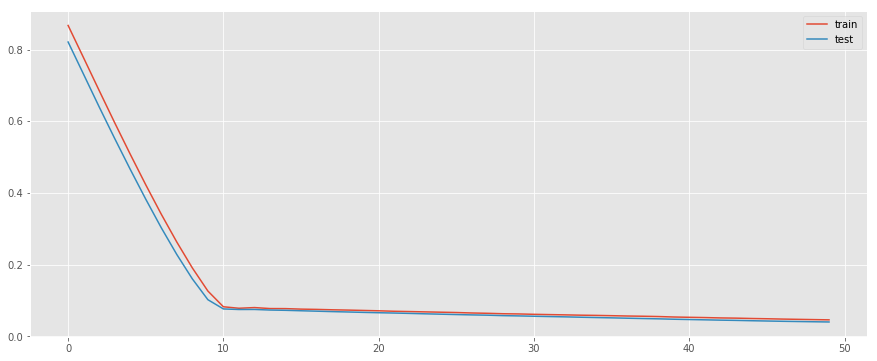

In [1337]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
model = Sequential()
model.add(LSTM(2, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=5, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [1338]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scalerSmall.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scalerSmall.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.068


In [1339]:
values2xLarge = reframed2xLarge.values
valuesmedium = reframedmedium.values

test2xLarge = values2xLarge
testmedium = valuesmedium


test_X2xLarge, test_y2xLarge = test2xLarge[:, :-1], test2xLarge[:, -1]
# reshape input to be 3D [samples, timesteps, features]
test_X2xLarge = test_X2xLarge.reshape((test_X2xLarge.shape[0], 1, test_X2xLarge.shape[1]))
print(test_X2xLarge.shape, test_y2xLarge.shape)

test_Xmedium, test_ymedium = testmedium[:, :-1], testmedium[:, -1]
# reshape input to be 3D [samples, timesteps, features]
test_Xmedium = test_Xmedium.reshape((test_Xmedium.shape[0], 1, test_Xmedium.shape[1]))
print(test_Xmedium.shape, test_ymedium.shape)

(235, 1, 4) (235,)
(167, 1, 4) (167,)


In [1340]:
# make a prediction
yhat2xLarge = model.predict(test_X2xLarge)
test_X2xLarge = test_X2xLarge.reshape((test_X2xLarge.shape[0], test_X2xLarge.shape[2]))
# invert scaling for forecast
inv_yhat2xLarge = concatenate((yhat2xLarge, test_X2xLarge[:, 1:]), axis=1)
inv_yhat2xLarge = scaler2xLarge.inverse_transform(inv_yhat2xLarge)
inv_yhat2xLarge = inv_yhat2xLarge[:,0]
# invert scaling for actual
test_y2xLarge = test_y2xLarge.reshape((len(test_y2xLarge), 1))
inv_y2xLarge = concatenate((test_y2xLarge, test_X2xLarge[:, 1:]), axis=1)
inv_y2xLarge = scaler2xLarge.inverse_transform(inv_y2xLarge)
inv_y2xLarge = inv_y2xLarge[:,0]
# calculate RMSE
rmse2xLarge = sqrt(mean_squared_error(inv_y2xLarge, inv_yhat2xLarge))
print('Test RMSE: %.3f' % rmse2xLarge)

Test RMSE: 0.041


In [1341]:
# make a prediction
yhatmedium = model.predict(test_Xmedium)
test_Xmedium = test_Xmedium.reshape((test_Xmedium.shape[0], test_Xmedium.shape[2]))
# invert scaling for forecast
inv_yhatmedium = concatenate((yhatmedium, test_Xmedium[:, 1:]), axis=1)
inv_yhatmedium = scalermedium.inverse_transform(inv_yhatmedium)
inv_yhatmedium = inv_yhatmedium[:,0]
# invert scaling for actual
test_ymedium = test_ymedium.reshape((len(test_ymedium), 1))
inv_ymedium = concatenate((test_ymedium, test_Xmedium[:, 1:]), axis=1)
inv_ymedium = scalermedium.inverse_transform(inv_ymedium)
inv_ymedium = inv_ymedium[:,0]
# calculate RMSE
rmsemedium = sqrt(mean_squared_error(inv_ymedium, inv_yhatmedium))
print('Test RMSE: %.3f' % rmsemedium)

Test RMSE: 0.081


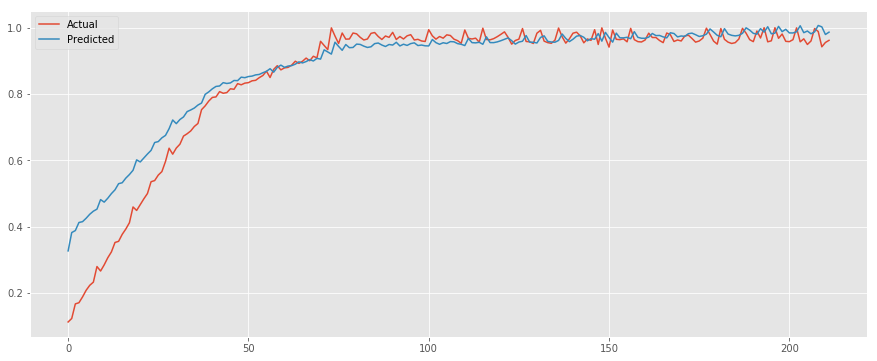

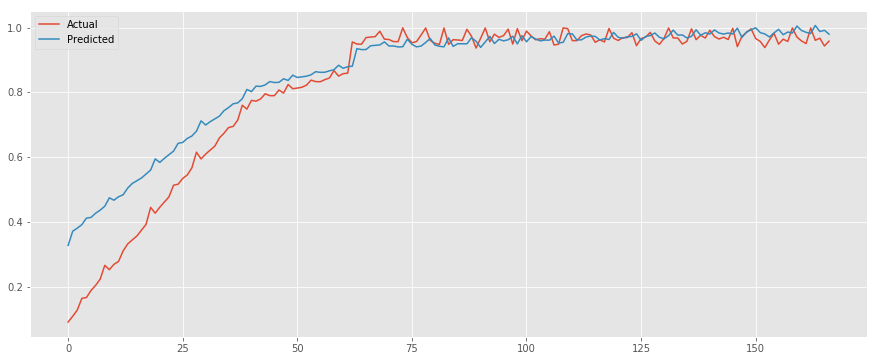

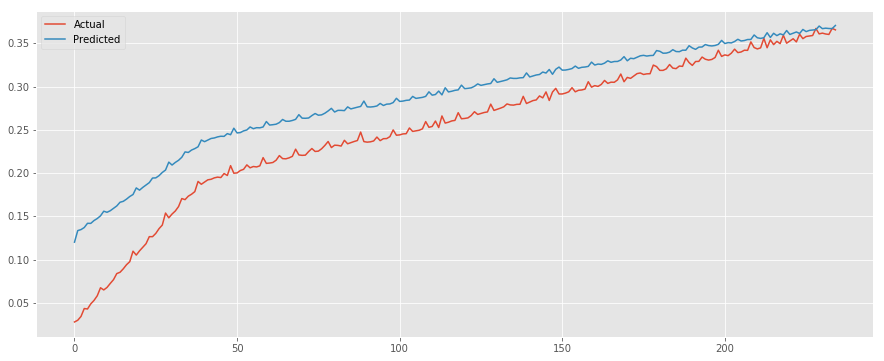

In [1342]:
pyplot.plot(inv_y, label = 'Actual')
pyplot.plot(inv_yhat, label = 'Predicted')
pyplot.legend()
pyplot.show()

pyplot.plot(inv_ymedium, label = 'Actual')
pyplot.plot(inv_yhatmedium, label = 'Predicted')
pyplot.legend()
pyplot.show()

pyplot.plot(inv_y2xLarge, label = 'Actual')
pyplot.plot(inv_yhat2xLarge, label = 'Predicted')
pyplot.legend()
pyplot.show()



In [1343]:

mongoclient2 = MongoClient('localhost', 27017)


In [1344]:
def getMongoDf2(dbName, collectionName):
    db = mongoclient[dbName]
    collection_name = collectionName
    datapoints = list(db.kubeserver.find({}))
    dfMongo = json_normalize(datapoints)
    dfMongo = dfMongo.drop(['intermediate'], axis=1)
    dfMongo = dfMongo.drop(['aggregate.codes.200'], axis=1)
    dfMongo = dfMongo.drop(['_id'], axis=1)
    if('aggregate.errors.ECONNRESET' in dfMongo.columns):
        dfMongo = dfMongo.drop(['aggregate.errors.ECONNRESET'], axis=1)
    if('aggregate.errors.ECONNREFUSED' in dfMongo.columns):
        dfMongo = dfMongo.drop(['aggregate.errors.ECONNREFUSED'], axis=1)
    if('aggregate.errors.ESOCKETTIMEDOUT' in dfMongo.columns):
        dfMongo = dfMongo.drop(['aggregate.errors.ETIMEDOUT'], axis=1)
    dfMongo = dfMongo.drop(['aggregate.latency.p95'], axis=1)
    dfMongo = dfMongo.drop(['aggregate.latency.p99'], axis=1)
    dfMongo = dfMongo.drop(['aggregate.rps.count'], axis=1)
    #dfMongo = dfMongo.drop(['aggregate.rps.mean'], axis=1)
    dfMongo = dfMongo.drop(['aggregate.scenarioDuration.max'], axis=1)
    dfMongo = dfMongo.drop(['aggregate.scenarioDuration.min'], axis=1)
    dfMongo = dfMongo.drop(['aggregate.scenarioDuration.p95'], axis=1)
    dfMongo = dfMongo.drop(['aggregate.scenarioDuration.p99'], axis=1)
    dfMongo = dfMongo.drop(['aggregate.latency.max'], axis=1)
    dfMongo = dfMongo.drop(['aggregate.latency.min'], axis=1)
    dfMongo = dfMongo.drop(['aggregate.matches'], axis=1)
    dfMongo = dfMongo.drop(['aggregate.requestsCompleted'], axis=1)
    return dfMongo

In [1345]:
def assignValues2(node,ns_name, pod_name,dbName,collectionName):
    df = getMongoDf2(dbName,collectionName)
    df2 = pd.DataFrame()
    df = df.reset_index(drop=True)
    df2 = df2.reset_index(drop=True)
    df['aggregate.scenariosCreated'] = df['aggregate.scenariosCreated'].values / df['aggregate.scenariosCreated'].max()
    df['aggregate.scenariosCompleted'] = df['aggregate.scenariosCompleted'].values / df['aggregate.scenariosCompleted'].max()
    df2['aggregate.latency.median'] = df['aggregate.latency.median'].values / df['aggregate.latency.median'].max()
    #df2['requestDurationMedian'] = pd.Series(df['aggregate.scenarioDuration.median'].values)
    #df3 = pd.concat([df2, df[['aggregate.latency.median', 'aggregate.scenarioDuration.median']]], axis=1)
    return df
    

In [1346]:
newdfmongoLarge = assignValues2(allNodeNames[3],nsNames[0], allPodNamesLarge[3],'t2large', 'testKube')
newdfmongoLarge = newdfmongoLarge.fillna(0)

newdf2Small = assignValues2(allNodeNames[2],nsNames[0], allPodNamesSmall[3],'t2small', 'testKube')
newdf2Small = newdf2Small.fillna(0)

newdf2Medium = assignValues2(allNodeNames[4],nsNames[0], allPodNamesMedium[3],'t2medium', 'testKube')
newdf2Medium = newdf2Medium.fillna(0)

newdf22xLarge = assignValues2(allNodeNames[1],nsNames[0], allPodNames2xLarge[3],'t22xlarge', 'testKube')
newdf22xLarge = newdf22xLarge.fillna(0)

In [1347]:
dfKerasSmall2 = newdf2Small.set_index(pd.DatetimeIndex(newdf2Small['aggregate.timestamp']))
dfKerasSmall2 = dfKerasSmall2.drop(['aggregate.timestamp'], axis=1)
dfKerasSmall2['core'] = 1
dfKerasSmall2['mem'] = 2
dfKerasSmall2['memNode'] = 0
dfKerasSmall2['cpuNode'] = 0

dfKeras2xLarge2 = newdf22xLarge.set_index(pd.DatetimeIndex(newdf22xLarge['aggregate.timestamp']))
dfKeras2xLarge2 = dfKeras2xLarge2.drop(['aggregate.timestamp'], axis=1)

dfKeras2xLarge2['core'] = 8
dfKeras2xLarge2['mem'] = 16
dfKeras2xLarge2['memNode'] = 0
dfKeras2xLarge2['cpuNode'] = 0

dfKerasMedium2 = newdf2Medium.set_index(pd.DatetimeIndex(newdf2Medium['aggregate.timestamp']))
dfKerasMedium2 = dfKerasMedium2.drop(['aggregate.timestamp'], axis=1)

dfKerasMedium2['core'] = 2
dfKerasMedium2['mem'] = 4
dfKerasMedium2['memNode'] = 0
dfKerasMedium2['cpuNode'] = 0

dfKeraslarge2 = newdfmongoLarge.set_index(pd.DatetimeIndex(newdfmongoLarge['aggregate.timestamp']))
dfKeraslarge2 = dfKeraslarge2.drop(['aggregate.timestamp'], axis=1)

dfKeraslarge2['core'] = 2
dfKeraslarge2['mem'] = 8
dfKeraslarge2['memNode'] = 0
dfKeraslarge2['cpuNode'] = 0

In [1348]:
# mark all NA values with 0
dfKeraslarge2.fillna(0, inplace=True)
#dfKeraslarge2 = dfKeraslarge2[['cpuNode', 'core','aggregate.scenariosCreated', 'mem']]
dfKeraslarge2 = dfKeraslarge2[['cpuNode', 'core','mem','aggregate.scenariosCreated']]

dfKerasSmall2.fillna(0, inplace=True)
#dfKerasSmall2 = dfKerasSmall2[['cpuNode', 'core','aggregate.scenariosCreated', 'mem']]
dfKerasSmall2 = dfKerasSmall2[['cpuNode', 'core','mem','aggregate.scenariosCreated']]

dfKeras.append(dfKerasMedium)

dfKeras2xLarge2.fillna(0, inplace=True)
#dfKeras2xLarge2 = dfKeras2xLarge2[['cpuNode', 'core','aggregate.scenariosCreated', 'mem']]
dfKeras2xLarge2 = dfKeras2xLarge2[['cpuNode', 'core','mem','aggregate.scenariosCreated']]

dfKerasMedium2.fillna(0, inplace=True)
#dfKerasMedium2 = dfKerasMedium2[['cpuNode', 'core','aggregate.scenariosCreated', 'mem']]
dfKerasMedium2 = dfKerasMedium2[['cpuNode', 'core', 'mem','aggregate.scenariosCreated']]
#dfKeras=dfKeras.append(dfKeras2xLarge)
dfKeraslarge2.head()

,cpuNode,core,mem,aggregate.scenariosCreated
aggregate.timestamp,,,,
2018-01-29 11:58:59.351,0,2,8,0.004694
2018-01-29 12:00:01.493,0,2,8,0.009388
2018-01-29 12:01:03.604,0,2,8,0.014082
2018-01-29 12:02:05.902,0,2,8,0.018776
2018-01-29 12:03:07.890,0,2,8,0.023471


In [1349]:
dfKeraslarge2.to_csv('datalarge2.csv')
dfKerasSmall2.to_csv('datasmall2.csv')
dfKeras2xLarge2.to_csv('data2xlarge2.csv')
dfKerasMedium2.to_csv('dataMedium2.csv')

In [1350]:
# load dataset
dataset2 = read_csv('datalarge2.csv', header=0, index_col=0)
values2 = dataset2.values
# integer encode direction
encoder2 = preprocessing.LabelEncoder()
values2[:,3] = encoder2.fit_transform(values2[:,3])
# ensure all data is float
values2 = values2.astype('float32')
# normalize features
scaler2 = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaled2 = scaler2.fit_transform(values2)
# frame as supervised learning
reframed2 = series_to_supervised(scaled2, 1, 1)
reframed2.drop(reframed2.columns[[5,6,7]], axis=1, inplace=True)
print(reframed2.head())


# load dataset
datasetSmall2 = read_csv('dataSmall2.csv', header=0, index_col=0)
valuesSmall2 = datasetSmall2.values
# integer encode direction
encoderSmall2 = preprocessing.LabelEncoder()
valuesSmall2[:,3] = encoderSmall2.fit_transform(valuesSmall2[:,3])
# ensure all data is float
valuesSmall2 = valuesSmall2.astype('float32')
# normalize features
scalerSmall2 = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaledSmall2 = scalerSmall2.fit_transform(valuesSmall2)
# frame as supervised learning
reframedSmall2 = series_to_supervised(scaledSmall2, 1, 1)
reframedSmall2.drop(reframedSmall2.columns[[5,6,7]], axis=1, inplace=True)
print(reframedSmall2.head())


# load dataset
dataset2xLarge2 = read_csv('data2xlarge2.csv', header=0, index_col=0)
values2xLarge2 = dataset2xLarge2.values
# integer encode direction
encoder2xLarge2 = preprocessing.LabelEncoder()
values2xLarge2[:,3] = encoder2xLarge2.fit_transform(values2xLarge2[:,3])
# ensure all data is float
values2xLarge2 = values2xLarge2.astype('float32')
# normalize features
scaler2xLarge2 = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaled2xLarge2 = scaler2xLarge2.fit_transform(values2xLarge2)
# frame as supervised learning
reframed2xLarge2 = series_to_supervised(scaled2xLarge2, 1, 1)
reframed2xLarge2.drop(reframed2xLarge2.columns[[5,6,7]], axis=1, inplace=True)
print(reframed2xLarge2.head())


# load dataset
datasetmedium2 = read_csv('datamedium2.csv', header=0, index_col=0)
valuesmedium2 = datasetmedium2.values
# integer encode direction
encodermedium2= preprocessing.LabelEncoder()
valuesmedium2[:,3] = encodermedium2.fit_transform(valuesmedium2[:,3])
# ensure all data is float
valuesmedium2 = valuesmedium2.astype('float32')
# normalize features
scalermedium2 = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaledmedium2 = scalermedium2.fit_transform(valuesmedium2)
# frame as supervised learning
reframedmedium2 = series_to_supervised(scaledmedium2, 1, 1)
reframedmedium2.drop(reframedmedium2.columns[[5,6,7]], axis=1, inplace=True)
print(reframedmedium2.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var1(t)
1        0.0        0.0        0.0   0.000000      0.0
2        0.0        0.0        0.0   0.004717      0.0
3        0.0        0.0        0.0   0.009434      0.0
4        0.0        0.0        0.0   0.014151      0.0
5        0.0        0.0        0.0   0.018868      0.0
   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var1(t)
1        0.0        0.0        0.0   0.000000      0.0
2        0.0        0.0        0.0   0.007937      0.0
3        0.0        0.0        0.0   0.015873      0.0
4        0.0        0.0        0.0   0.023810      0.0
5        0.0        0.0        0.0   0.031746      0.0
   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var1(t)
1        0.0        0.0        0.0   0.000000      0.0
2        0.0        0.0        0.0   0.004255      0.0
3        0.0        0.0        0.0   0.008511      0.0
4        0.0        0.0        0.0   0.012766      0.0
5        0.0        0.0        0.0   0.017021      0.0
   var1(t-

In [1351]:
values2xLarge2 = reframed2xLarge2.values
valuesmedium2 = reframedmedium2.values
valuessmall2 = reframedSmall2.values
valuesLarge2 = reframed2.values

test2xLarge2 = values2xLarge2
testmedium2= valuesmedium2
testsmall2 = valuessmall2
testlarge2= valuesLarge2

test_X2xLarge2, test_y2xLarge2 = test2xLarge2[:, :-1], test2xLarge2[:, -1]
# reshape input to be 3D [samples, timesteps, features]
test_X2xLarge2 = test_X2xLarge2.reshape((test_X2xLarge2.shape[0], 1, test_X2xLarge2.shape[1]))
print(test_X2xLarge2.shape, test_y2xLarge2.shape)

test_Xmedium2, test_ymedium2 = testmedium2[:, :-1], testmedium2[:, -1]
# reshape input to be 3D [samples, timesteps, features]
test_Xmedium2 = test_Xmedium2.reshape((test_Xmedium2.shape[0], 1, test_Xmedium2.shape[1]))
print(test_Xmedium2.shape, test_ymedium2.shape)


test_XLarge2, test_yLarge2 = testlarge2[:, :-1], testlarge2[:, -1]
# reshape input to be 3D [samples, timesteps, features]
test_XLarge2 = test_XLarge2.reshape((test_XLarge2.shape[0], 1, test_XLarge2.shape[1]))
print(test_XLarge2.shape, test_yLarge2.shape)


test_Xsmall2, test_ysmall2 = testsmall2[:, :-1], testsmall2[:, -1]
# reshape input to be 3D [samples, timesteps, features]
test_Xsmall2 = test_Xsmall2.reshape((test_Xsmall2.shape[0], 1, test_Xsmall2.shape[1]))
print(test_Xsmall2.shape, test_ysmall2.shape)

(235, 1, 4) (235,)
(167, 1, 4) (167,)
(212, 1, 4) (212,)
(126, 1, 4) (126,)


In [1352]:
# make a prediction
yhat2xLarge2 = model.predict(test_X2xLarge2)
test_X2xLarge2 = test_X2xLarge2.reshape((test_X2xLarge2.shape[0], test_X2xLarge2.shape[2]))
# invert scaling for forecast
inv_yhat2xLarge2 = concatenate((yhat2xLarge2, test_X2xLarge2[:, 1:]), axis=1)
inv_yhat2xLarg2e = scaler2xLarge2.inverse_transform(inv_yhat2xLarge2)
inv_yhat2xLarge2 = inv_yhat2xLarge2[:,0]
# invert scaling for actual
test_y2xLarge2 = test_y2xLarge2.reshape((len(test_y2xLarge2), 1))
inv_y2xLarge2 = concatenate((test_y2xLarge2, test_X2xLarge2[:, 1:]), axis=1)
inv_y2xLarge2 = scaler2xLarge2.inverse_transform(inv_y2xLarge2)
inv_y2xLarge2 = inv_y2xLarge2[:,0]
# calculate RMSE
rmse2xLarge2 = sqrt(mean_squared_error(inv_y2xLarge2, inv_yhat2xLarge2))
print('Test RMSE: %.3f' % rmse2xLarge2)

Test RMSE: 0.376


In [1353]:
# make a prediction
yhatmedium2 = model.predict(test_Xmedium2)
test_Xmedium2 = test_Xmedium2.reshape((test_Xmedium2.shape[0], test_Xmedium2.shape[2]))
# invert scaling for forecast
inv_yhatmedium2 = concatenate((yhatmedium2, test_Xmedium2[:, 1:]), axis=1)
inv_yhatmedium2 = scalermedium2.inverse_transform(inv_yhatmedium2)
inv_yhatmedium2= inv_yhatmedium2[:,0]
# invert scaling for actual
test_ymedium2 = test_ymedium2.reshape((len(test_ymedium2), 1))
inv_ymedium2 = concatenate((test_ymedium2, test_Xmedium2[:, 1:]), axis=1)
inv_ymedium2 = scalermedium2.inverse_transform(inv_ymedium2)
inv_ymedium2 = inv_ymedium2[:,0]
# calculate RMSE
rmsemedium2 = sqrt(mean_squared_error(inv_ymedium2, inv_yhatmedium2))
print('Test RMSE: %.3f' % rmsemedium2)

Test RMSE: 0.376


In [1354]:
# make a prediction
yhatsmall2 = model.predict(test_Xsmall2)
test_Xsmall2 = test_Xsmall2.reshape((test_Xsmall2.shape[0], test_Xsmall2.shape[2]))
# invert scaling for forecast
inv_yhatsmall2 = concatenate((yhatsmall2, test_Xsmall2[:, 1:]), axis=1)
inv_yhatsmall2 = scalerSmall2.inverse_transform(inv_yhatsmall2)
inv_yhatsmall2= inv_yhatsmall2[:,0]
# invert scaling for actual
test_ysmall2 = test_ysmall2.reshape((len(test_ysmall2), 1))
inv_ysmall2 = concatenate((test_ysmall2, test_Xsmall2[:, 1:]), axis=1)
inv_ysmall2 = scalerSmall2.inverse_transform(inv_ysmall2)
inv_ysmall2 = inv_ysmall2[:,0]
# calculate RMSE
rmsemedium2 = sqrt(mean_squared_error(inv_ysmall2, inv_yhatsmall2))
print('Test RMSE: %.3f' % rmsemedium2)

Test RMSE: 0.376


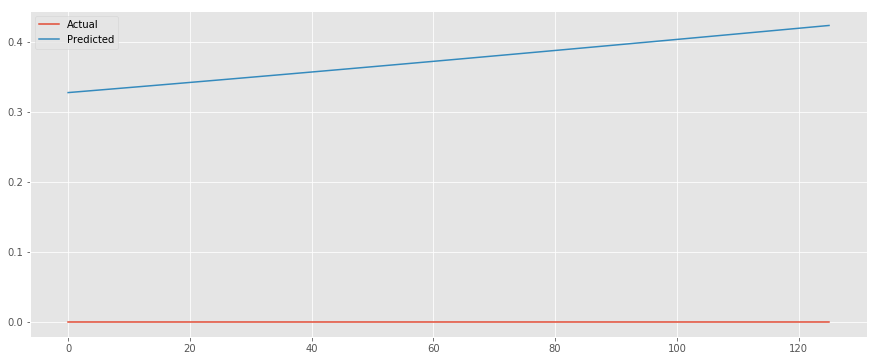

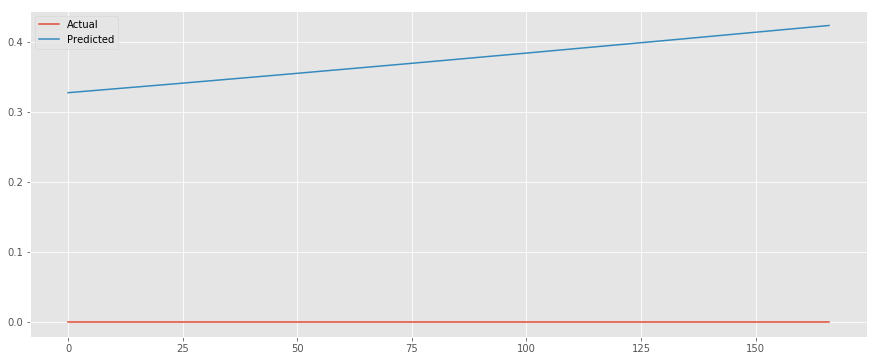

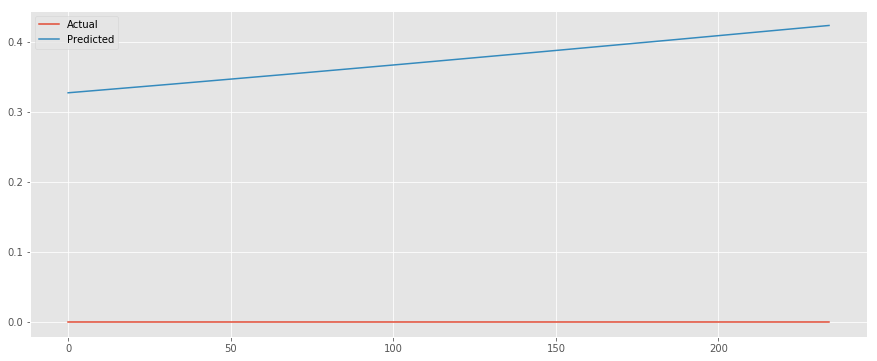

In [1355]:
pyplot.plot(inv_ysmall2, label = 'Actual')
pyplot.plot(inv_yhatsmall2, label = 'Predicted')
pyplot.legend()
pyplot.show()

pyplot.plot(inv_ymedium2, label = 'Actual')
pyplot.plot(inv_yhatmedium2, label = 'Predicted')
pyplot.legend()
pyplot.show()

pyplot.plot(inv_y2xLarge2, label = 'Actual')
pyplot.plot(inv_yhat2xLarge2, label = 'Predicted')
pyplot.legend()
pyplot.show()